In [59]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## REPORTE 7 

- Julia Millen Massa Coronel 20196415 

In [55]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [56]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [57]:
pd.get_dummies(data_2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


Text(19.309791666666662, 0.5, 'EstudianteS')

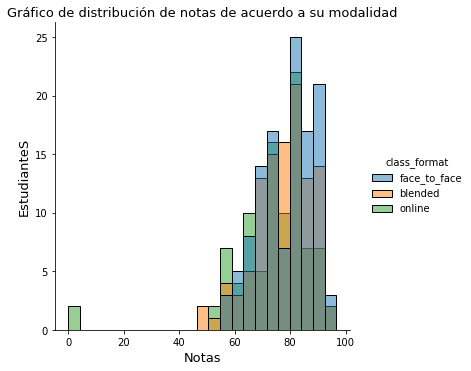

In [75]:
sns.displot(data_2, x="falsexam", hue= "class_format")
plt.title("Gráfico de distribución de notas de acuerdo a su modalidad", fontsize=13)
plt.xlabel("Notas", fontsize=13)
plt.ylabel("EstudianteS", fontsize=13)

- Interpretación: es interesante como el grupo que es atipico con las peores notas son los que estudian online. Luego, vemos que la modalidad con las notas más altas es la de "face to face" y muy cerca está la modalidad combinada. Eso nos lleva a pensar que el aprendizaje resulta más enriquecedor cuando la interacción física es mayor a la virtual.  

## Estimador de diferencia de medias.

In [63]:
VAM=data_2[['class_format','falsexam']]
VAM.head(13)

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
2,blended,83.37000
3,blended,90.01994
4,online,83.30000
5,online,88.34996
6,blended,78.40000
7,face_to_face,90.00000
8,face_to_face,88.31000
9,online,73.37000


In [64]:
Dividir= ["face_to_face","online"]

In [67]:
VAMP= VAM[VAM['class_format'].isin(Dividir)]
VAMP

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


## Calcular el promedio de notas 

In [70]:
VAMP.groupby(["class_format"]).mean ()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [71]:
Diferencia_medias=  78.547485-73.635263
Diferencia_medias

4.912222

In [ ]:
- Interpretación


## Estimador de diferencia de medias mediante regresión lineal

In [72]:
ols_reg=sm.OLS.from_formula("falsexam~class_format", data= VAMP).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        11:33:52   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78.5475      1.113     70.563      0.000      76.353      80.742
class_format[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que las clases presenciales obtienen una puntuación media de 78,54, mientras que los cursos en línea obtienen una puntuación media de 73,63. No son tan buenas noticias para los defensores del aprendizaje en línea. Así, el TCA de una clase en línea es de -4,91. Esto significa que las clases en línea hacen que los estudiantes rindan unos 5 puntos menos, de media.

## LECTURA

El presente texto analiza los efectos que tiene en el futuro de niños un cambio en su lugar de residencia. Concretamente re- analiza el experimento MTO, pero se centra en sus efectos a largo plazo. Es decir, se enfoca en los niños que eran pequeños cuando sus familias se trasladaron a barrios mejores. En ese sentido, se busca averiguar cómo afecta el traslado de una de una zona a otra de menos pobreza en los resultados económicos de los niños y si la edad condiciona dichos resultados. 

Una de las debilidades del analisis es que se centra solo en los datos disponibles formalmente; por ejemplo, si un individuo no tiene declaración de impuestos, practicamente lo consideran como que no tiene ingresos. Considero que eso prodría llevar a un sesgo en la recopilación de información. Luego, vemos que los resultados de la universidad son solo para los niños que tenías 4 años o más en el momento de la RA y los ingresos solo para los que tenían 6. Por lo tanto, las estimaciones de los impactos al nacer se basan en extrapolaciones fuera de la muestra basadas en la forma funcional lineal. Una de las fortalezas del enfoque del documento es que se centra mucho en los resultados del análisis previo, por lo que no se desvía del objetivo principal y ya tiene un camino que seguir, debatir y confirmar. 

Entre las contribuciones de este artículo encontramos que las cuestiones que estudia no se habían podido estudiar, porque los niños más jóvenes del experimento MTO sólo tienen ahora la edad suficiente para entrar en el mercado laboral de los adultos. Luego, se ve que se confirman las dos hipotesis planteadas: el traslado a una zona de menor pobreza mejora los resultados económicos a largo plazo de los niños que eran jóvenes en el momento de la asignación aleatoria (AR) y los beneficios de trasladarse a una zona de menor pobreza disminuyen con la edad del niño en el momento del traslado. El traslado a un barrio de menor pobreza tuvo efectos ligeramente negativos en los resultados de los niños mayores. Lo último se piensa que se debe a que trasladarse a un entorno muy diferente, especialmente en la adolescencia, podría perturbar las redes sociales y tener otros efectos adversos en el desarrollo. En esa línea, se encontraron pruebas sólidas de que los beneficios de trasladarse a zonas de menor pobreza disminuyen con la edad del niño en el momento
del traslado, lo que sugiere que cada año adicional de exposición a un entorno de baja pobreza durante la infancia es beneficioso.

 Finalmente, como los calculos se centran exclusivamente en los beneficios en términos de ingresos de los niños y, por tanto, dejan de lado otros beneficios, como la mejora del bienestar subjetivo y la salud de los adultos. Sería interesante enfocarnos en los beneficios que les trae a largo plazo a los adultos o los efectos indirectos sobre los residentes anteriores de los barrios a los que se trasladaron las familias MTO. Aunque para continuar con el hilo de la pregunta de investigación, resultaría más acotado ver si los efectos son mayores a edades más tempranas, pues solo se observaron los resultados a largo plazo de los niños que tenían cuatro años o más en el momento de la asignación aleatoria. 

